## IMPORT LIBRARIES

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## LOAD AND SEE DATA

In [2]:
df=pd.read_csv("fire.csv")

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [4]:
df.head()

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR,DAY
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700,1,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145,2,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220,3,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090,4,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100,5,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14988 entries, 0 to 14987
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   14988 non-null  datetime64[ns]
 1   PRECIPITATION          14987 non-null  float64       
 2   MAX_TEMP               14987 non-null  float64       
 3   MIN_TEMP               14987 non-null  float64       
 4   AVG_WIND_SPEED         14976 non-null  float64       
 5   FIRE_START_DAY         14988 non-null  bool          
 6   YEAR                   14988 non-null  int32         
 7   TEMP_RANGE             14987 non-null  float64       
 8   WIND_TEMP_RATIO        14976 non-null  float64       
 9   MONTH                  14988 non-null  int32         
 10  SEASON                 14988 non-null  object        
 11  LAGGED_PRECIPITATION   14988 non-null  float64       
 12  LAGGED_AVG_WIND_SPEED  14988 non-null  float64       
 13  D

In [6]:
df.isna().sum()

DATE                      0
PRECIPITATION             1
MAX_TEMP                  1
MIN_TEMP                  1
AVG_WIND_SPEED           12
FIRE_START_DAY            0
YEAR                      0
TEMP_RANGE                1
WIND_TEMP_RATIO          12
MONTH                     0
SEASON                    0
LAGGED_PRECIPITATION      0
LAGGED_AVG_WIND_SPEED     0
DAY_OF_YEAR               0
DAY                       0
dtype: int64

In [7]:
numeric_cols = ['PRECIPITATION','MAX_TEMP','MIN_TEMP','AVG_WIND_SPEED','TEMP_RANGE','WIND_TEMP_RATIO']

for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [8]:
df.isna().sum()

DATE                     0
PRECIPITATION            0
MAX_TEMP                 0
MIN_TEMP                 0
AVG_WIND_SPEED           0
FIRE_START_DAY           0
YEAR                     0
TEMP_RANGE               0
WIND_TEMP_RATIO          0
MONTH                    0
SEASON                   0
LAGGED_PRECIPITATION     0
LAGGED_AVG_WIND_SPEED    0
DAY_OF_YEAR              0
DAY                      0
dtype: int64

## Exploratory Data Analysis (EDA)

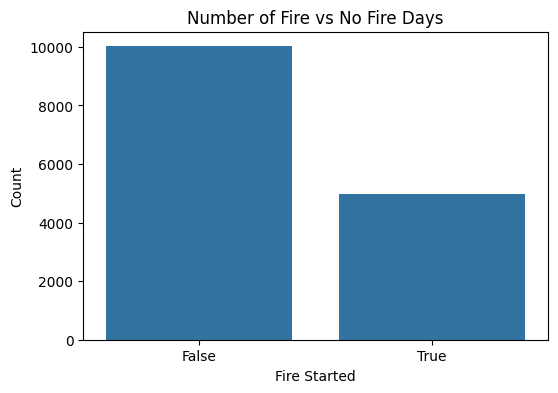

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='FIRE_START_DAY', data=df)
plt.title('Number of Fire vs No Fire Days')
plt.xlabel('Fire Started')
plt.ylabel('Count')
plt.show()

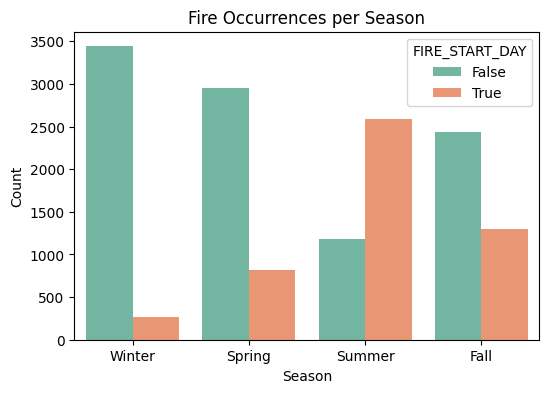

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='SEASON', hue='FIRE_START_DAY', data=df, palette='Set2')
plt.title('Fire Occurrences per Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

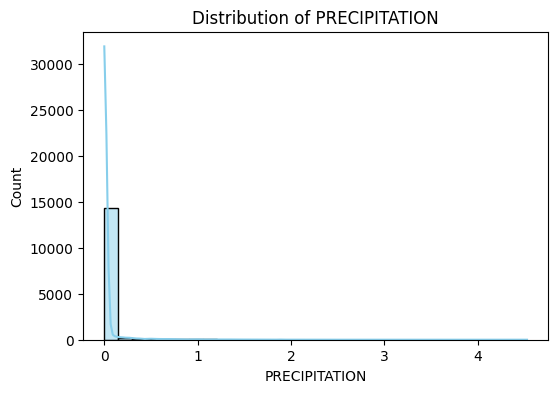

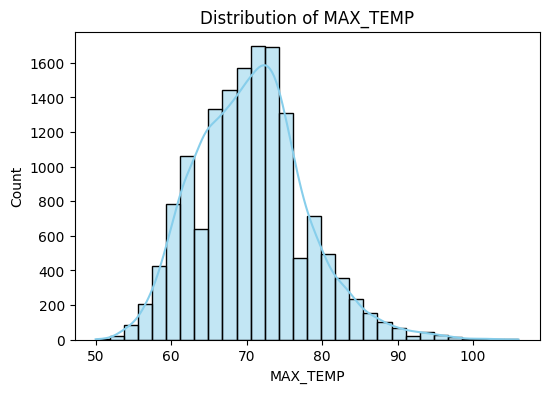

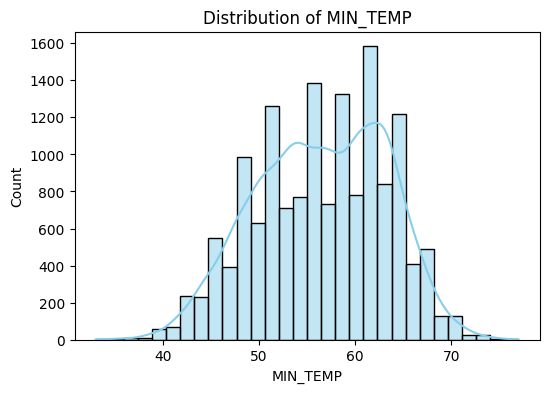

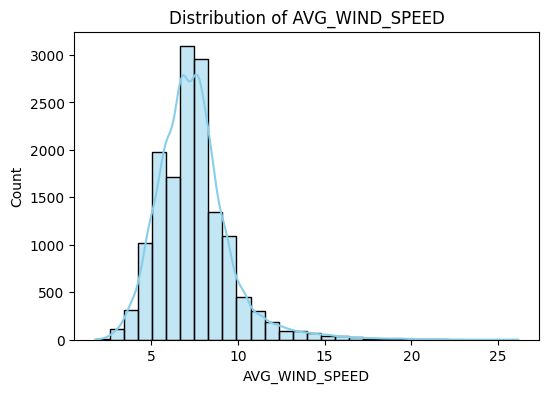

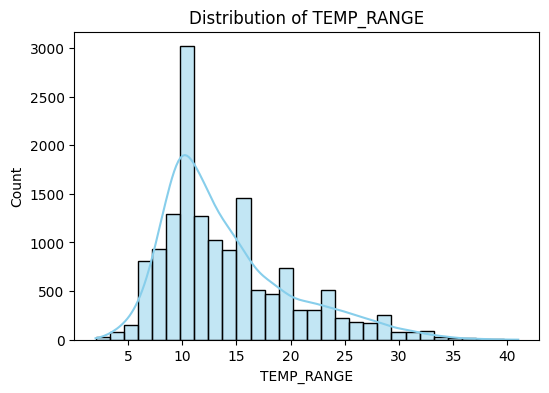

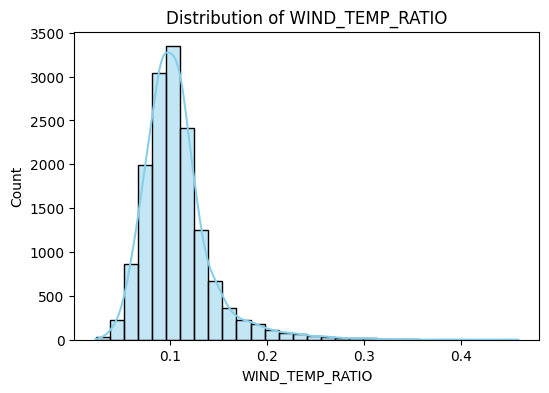

In [11]:
numeric_features = ['PRECIPITATION','MAX_TEMP','MIN_TEMP','AVG_WIND_SPEED','TEMP_RANGE','WIND_TEMP_RATIO']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

Target Imbalance: Many more no-fire days than fire days → may need class balancing (e.g., SMOTE, class weights) for ML.

Seasonal Pattern: Fire occurrence is higher in certain seasons → include SEASON as categorical feature.

Numeric Features Spread: Features like PRECIPITATION, MAX_TEMP, AVG_WIND_SPEED, TEMP_RANGE show variability → likely predictive.

Traditional ML Classification:
Random Forest Classifier
XGBoost Classifier
Logistic Regression


Optional Bonus (Deep Learning)
Feed-forward Neural Network for classification
Input numeric features + one-hot encode categorical features

Handle Imbalance:
Use class_weight='balanced' in sklearn classifiers, or apply SMOTE on training data

## Train & Evaluate ML

In [12]:
season_df = pd.get_dummies(df['SEASON'], prefix='SEASON')
df_encoded = pd.concat([df.drop('SEASON', axis=1), season_df], axis=1)

In [13]:
df_encoded.head()

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR,DAY,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,0.0,4.700,1,1,False,False,False,True
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,0.0,5.145,2,2,False,False,False,True
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,0.0,5.220,3,3,False,False,False,True
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,0.0,5.090,4,4,False,False,False,True
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,0.0,5.100,5,5,False,False,False,True


In [14]:
y = df_encoded["FIRE_START_DAY"]
X = df_encoded.drop(columns=["FIRE_START_DAY", "DATE", "YEAR", "DAY", "MONTH", "DAY_OF_YEAR"])  

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Train Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [18]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [19]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [20]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
rf_grid = GridSearchCV(rf, rf_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
print("Random Forest best params:", rf_grid.best_params_)

Random Forest best params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


### Train XGBoost

In [22]:
import xgboost as xgb

In [23]:
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss', 
    random_state=42,
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
)

In [24]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

In [25]:
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_best = xgb_grid.best_estimator_
print("XGBoost best params:", xgb_grid.best_params_)

XGBoost best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}


### Evaluate For best one

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
labels = ['No Fire', 'Fire']

In [28]:
y_pred_rf = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7565043362241495

Classification Report (RF):
               precision    recall  f1-score   support

       False       0.82      0.81      0.82      2004
        True       0.63      0.65      0.64       994

    accuracy                           0.76      2998
   macro avg       0.73      0.73      0.73      2998
weighted avg       0.76      0.76      0.76      2998



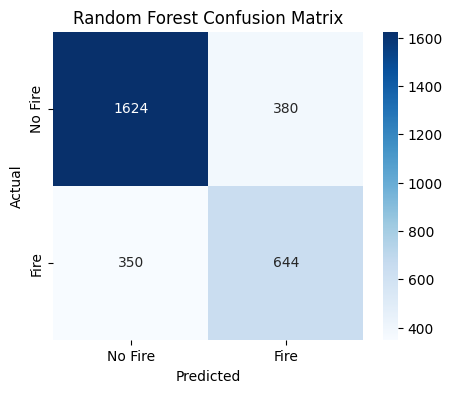

In [29]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
y_pred_xgb = xgb_best.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)
print("\nClassification Report (XGB):\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7498332221480988

Classification Report (XGB):
               precision    recall  f1-score   support

       False       0.86      0.75      0.80      2004
        True       0.60      0.76      0.67       994

    accuracy                           0.75      2998
   macro avg       0.73      0.75      0.73      2998
weighted avg       0.77      0.75      0.76      2998



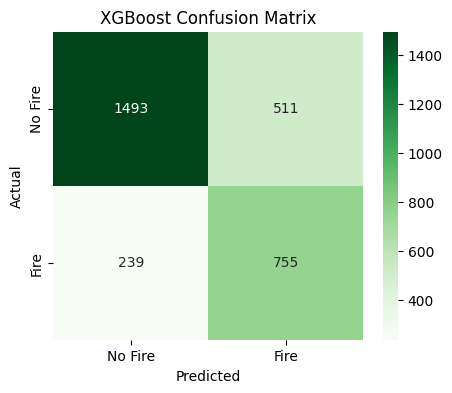

In [31]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens' ,xticklabels=labels, yticklabels=labels)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Save the best one

In [32]:
import joblib

In [33]:
if rf_acc >= xgb_acc:
    best_model = rf_best
    print("Best model: Random Forest")
else:
    best_model = xgb_best
    print("Best model: XGBoost")

Best model: Random Forest


In [34]:
best_model.fit(X, y)
joblib.dump(best_model, "best_fire_model.pkl")

['best_fire_model.pkl']

In [35]:
sample = X.iloc[0:1]  # first row
pred = best_model.predict(sample)
print("Prediction for first row:", pred)

Prediction for first row: [False]


## NOW FOR DEEP LEARNING

In [50]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [52]:
X_dl = X.copy()
y_dl = y.copy()

In [53]:
scaler_dl = StandardScaler()
X_dl_scaled = scaler_dl.fit_transform(X_dl)

In [54]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl_scaled, y_dl, test_size=0.2, random_state=42)

In [55]:
X_train_tensor_dl = torch.tensor(X_train_dl, dtype=torch.float32).to(device)
X_test_tensor_dl = torch.tensor(X_test_dl, dtype=torch.float32).to(device)
y_train_tensor_dl = torch.tensor(y_train_dl.values, dtype=torch.float32).view(-1,1).to(device)
y_test_tensor_dl = torch.tensor(y_test_dl.values, dtype=torch.float32).view(-1,1).to(device)

In [56]:
train_dataset_dl = TensorDataset(X_train_tensor_dl, y_train_tensor_dl)
train_loader_dl = DataLoader(train_dataset_dl, batch_size=32, shuffle=True)

In [57]:
class FireNN_DL(nn.Module):
    def __init__(self, input_dim):
        super(FireNN_DL, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model_dl = FireNN_DL(X_train_dl.shape[1]).to(device)

In [58]:
criterion_dl = nn.BCELoss()
optimizer_dl = torch.optim.Adam(model_dl.parameters(), lr=0.001)

In [59]:
epochs = 50
for epoch in range(epochs):
    for xb, yb in train_loader_dl:
        optimizer_dl.zero_grad()
        pred = model_dl(xb)
        loss = criterion_dl(pred, yb)
        loss.backward()
        optimizer_dl.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/50, Loss: 0.6127
Epoch 20/50, Loss: 0.2684
Epoch 30/50, Loss: 0.2939
Epoch 40/50, Loss: 0.4867
Epoch 50/50, Loss: 0.3412


In [60]:
with torch.no_grad():
    test_pred_dl = model_dl(X_test_tensor_dl)
    predicted_classes_dl = (test_pred_dl >= 0.5).float()
    accuracy_dl = (predicted_classes_dl == y_test_tensor_dl).float().mean()
    print("PyTorch DL Test Accuracy:", accuracy_dl.item())

PyTorch DL Test Accuracy: 0.7688459157943726


In [61]:
# Convert full dataset to tensor and move to device
X_full_tensor = torch.tensor(scaler_dl.transform(X_dl), dtype=torch.float32).to(device)
y_full_tensor = torch.tensor(y_dl.values, dtype=torch.float32).view(-1,1).to(device)

full_dataset = TensorDataset(X_full_tensor, y_full_tensor)
full_loader = DataLoader(full_dataset, batch_size=32, shuffle=True)

# Fresh model
model_full_dl = FireNN_DL(X_full_tensor.shape[1]).to(device)
criterion_full = nn.BCELoss()
optimizer_full = torch.optim.Adam(model_full_dl.parameters(), lr=0.001)

# Train on full data
for epoch in range(epochs):
    for xb, yb in full_loader:
        optimizer_full.zero_grad()
        pred = model_full_dl(xb)
        loss = criterion_full(pred, yb)
        loss.backward()
        optimizer_full.step()
    if (epoch+1) % 10 == 0:
        print(f"[Full Data] Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

[Full Data] Epoch 10/50, Loss: 0.5193
[Full Data] Epoch 20/50, Loss: 0.3791
[Full Data] Epoch 30/50, Loss: 0.6056
[Full Data] Epoch 40/50, Loss: 0.4705
[Full Data] Epoch 50/50, Loss: 0.5983


In [62]:
# Save model and scaler
torch.save(model_full_dl.state_dict(), "best_fire_model_dl.pth")
joblib.dump(scaler_dl, "scaler_dl.pkl")
print("Full dataset model and scaler saved!")

Full dataset model and scaler saved!


## Evaluation for Streamlit

In [37]:
min_precip = df_encoded['LAGGED_PRECIPITATION'].min()
max_precip = df_encoded['LAGGED_PRECIPITATION'].max()

min_wind = df_encoded['LAGGED_AVG_WIND_SPEED'].min()
max_wind = df_encoded['LAGGED_AVG_WIND_SPEED'].max()

print(f"LAGGED_PRECIPITATION: Min = {min_precip}, Max = {max_precip}")
print(f"LAGGED_AVG_WIND_SPEED: Min = {min_wind}, Max = {max_wind}")

LAGGED_PRECIPITATION: Min = 0.0, Max = 8.18
LAGGED_AVG_WIND_SPEED: Min = 3.2271428571428573, Max = 13.932857142857143


In [38]:
df_encoded['MAX_TEMP'].max()

np.float64(106.0)

In [39]:
df_encoded['MIN_TEMP'].max()

np.float64(77.0)

In [40]:
fire_df = df_encoded[df_encoded['FIRE_START_DAY'] == True]
fire_df

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR,DAY,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
26,1984-01-27,0.0,79.0,57.0,8.50,True,1984,22.0,0.107595,1,0.00,7.222857,27,27,False,False,False,True
79,1984-03-20,0.0,76.0,58.0,6.71,True,1984,18.0,0.088289,3,0.14,8.691429,80,20,False,True,False,False
82,1984-03-23,0.0,77.0,54.0,7.38,True,1984,23.0,0.095844,3,0.00,7.477143,83,23,False,True,False,False
88,1984-03-29,0.0,71.0,53.0,11.41,True,1984,18.0,0.160704,3,0.00,7.988571,89,29,False,True,False,False
102,1984-04-12,0.0,73.0,53.0,5.14,True,1984,20.0,0.070411,4,0.87,7.347143,103,12,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583,2023-12-05,0.0,83.0,54.0,5.37,True,2023,29.0,0.064699,12,0.00,6.071429,339,5,False,False,False,True
14587,2023-12-09,0.0,73.0,49.0,3.13,True,2023,24.0,0.042877,12,0.00,5.305714,343,9,False,False,False,True
14593,2023-12-15,0.0,80.0,52.0,6.04,True,2023,28.0,0.075500,12,0.00,5.400000,349,15,False,False,False,True
14594,2023-12-16,0.0,79.0,56.0,6.49,True,2023,23.0,0.082152,12,0.00,5.880000,350,16,False,False,False,True
